# Usage: datasets
Here, we will review the raw/cleaned datasets. `Scenario` class performs data cleaning internally using `JHUData` class and so on, but it is important to review the features and data types before analysing them.

### Preparation
Prepare the packages.

In [1]:
# !pip install covsirphy

In [2]:
import os
from pprint import pprint
import covsirphy as cs

### Dataset preparation
Download the datasets to "input" directory and load them.

If "input" directory has the datasets, `DataLoader` instance will load the local files. If the datasets were updated in remote servers, `DataLoader` will update the local files automatically and download the datasets to "input" directory and load them.

In [3]:
# Create DataLoader instance
data_loader = cs.DataLoader("input")

# (Main) The number of cases (JHU style)
jhu_data = data_loader.jhu()
# (Main) Population in each country
population_data = data_loader.population()
# (Main) Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt()
# Linelist of case reports
linelist = data_loader.linelist()
# The number of tests
pcr_data = data_loader.pcr()
# The number of vaccinations
vaccine_data = data_loader.vaccine()
# Population pyramid
pyramid_data = data_loader.pyramid()

### The number of cases (JHU style)
The main dataset is that of the number of cases and was saved as `jhu_data`, an instance of `JHUData` class. This includes "Confirmed", "Infected", "Recovered" and "Fatal". "Infected" was calculated as "Confirmed - Recovered - Fatal".

The dataset will be retrieved from [COVID-19 Data Hub](https://covid19datahub.io/) and [Data folder of CovsirPhy project](https://github.com/lisphilar/covid19-sir/tree/master/data). Description of these projects will be shown as follows.

In [4]:
country = 'Romania'
print(country in set(jhu_data.countries()) & set(population_data.countries()))
#pprint(set(jhu_data.countries()) & set(population_data.countries()), compact=True)

True


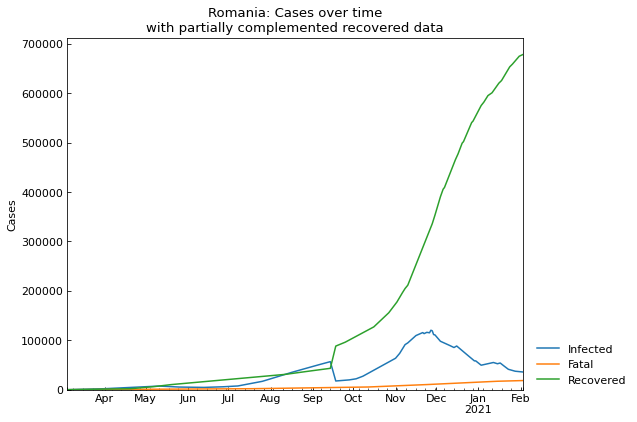

In [5]:
snl = cs.Scenario(jhu_data, population_data, country=country)
snl_df = snl.records()
#print(snl_df)

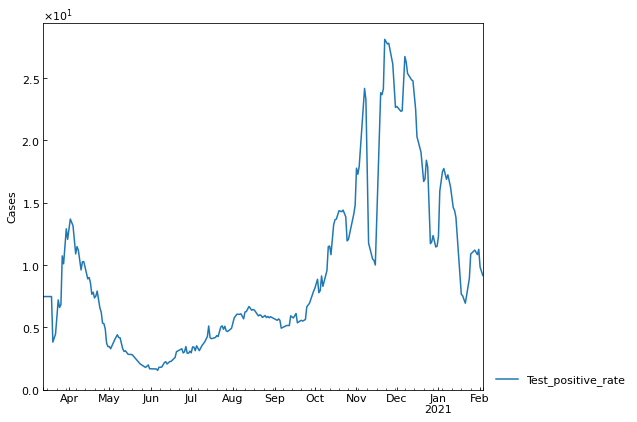

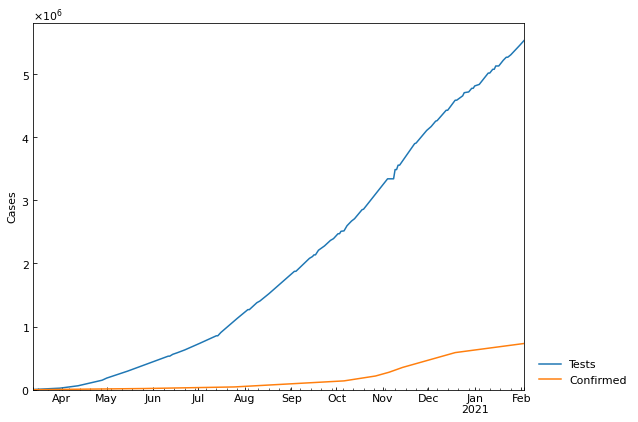

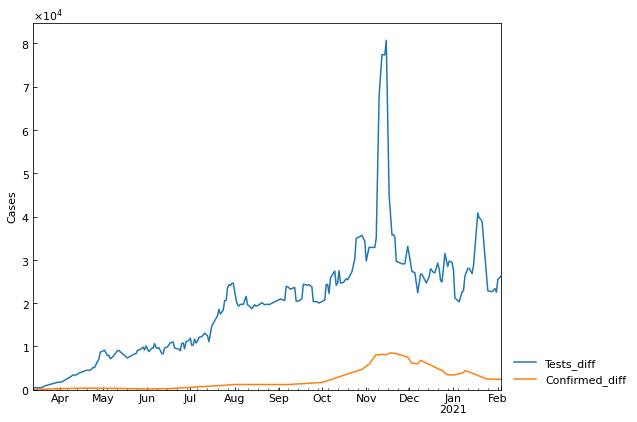

In [6]:
df = pcr_data.positive_rate(country, show_figure=False)
#print(df)
df = df.set_index("Date")
cs.line_plot(df[["Test_positive_rate"]])
cs.line_plot(df[["Tests","Confirmed"]])
cs.line_plot(df[["Tests_diff","Confirmed_diff"]])

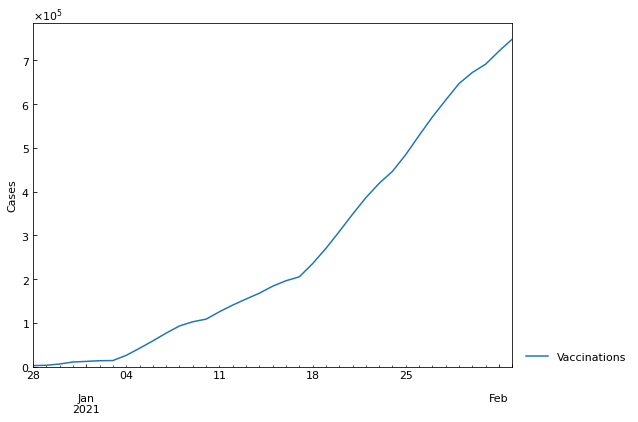

In [7]:
# Calculate total values
df = vaccine_data.records(country)
df = df.set_index("Date")
#print(df)
cs.line_plot(df)

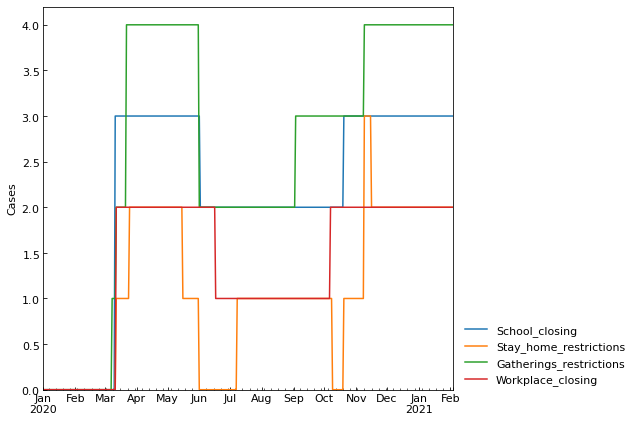

In [8]:
df = oxcgrt_data.subset(country)
df = df.set_index("Date")
#print(df)
cs.line_plot(df[["School_closing", "Stay_home_restrictions", "Gatherings_restrictions", "Workplace_closing"]])
#cs.line_plot(df[["Stay_home_restrictions", "Gatherings_restrictions"]])

In [9]:
pyramid_data.records(country)

,Age,Population,Per_total
0,0,187964,0.010172
1,1,187964,0.010172
2,2,187964,0.010172
3,3,187964,0.010172
4,4,187964,0.010172
...,...,...,...
113,118,21684,0.001173
114,119,21684,0.001173
115,120,21684,0.001173
116,121,21684,0.001173


In [10]:
# Model name
print(cs.SIRF.NAME)
# Example parameter values
pprint(cs.SIRF.EXAMPLE, compact=True)


SIR-F
{'param_dict': {'kappa': 0.005, 'rho': 0.2, 'sigma': 0.075, 'theta': 0.002},
 'population': 1000000,
 'step_n': 180,
 'y0_dict': {'Fatal': 0,
             'Infected': 1000,
             'Recovered': 0,
             'Susceptible': 999000}}


In [11]:
snl = cs.Scenario(jhu_data, population_data, country=country, province=None)

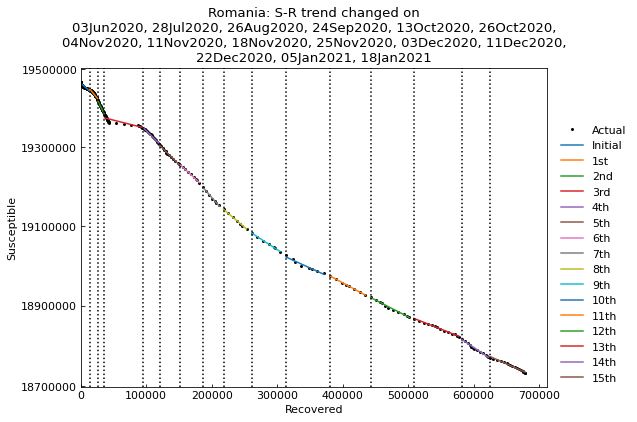

,Type,Start,End,Population
0th,Past,04Mar2020,02Jun2020,19466145
1st,Past,03Jun2020,27Jul2020,19466145
2nd,Past,28Jul2020,25Aug2020,19466145
3rd,Past,26Aug2020,23Sep2020,19466145
4th,Past,24Sep2020,12Oct2020,19466145
5th,Past,13Oct2020,25Oct2020,19466145
6th,Past,26Oct2020,03Nov2020,19466145
7th,Past,04Nov2020,10Nov2020,19466145
8th,Past,11Nov2020,17Nov2020,19466145
9th,Past,18Nov2020,24Nov2020,19466145


In [12]:
snl.trend()
snl.summary()

In [13]:
snl.estimate(cs.SIRF, timeout=60)


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...
	13th phase (26Aug2020 - 23Sep2020): finished  847 trials in 1 min  0 sec
Completed optimization. Total: 3 min  0 sec


In [14]:
snl.summary()

,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/alpha2 [day],1/beta [day],1/gamma [day],alpha1 [-],RMSLE,Trials,Runtime
0th,Past,04Mar2020,02Jun2020,19466145,SIR-F,4.60,0.033336,0.000892,0.024370,0.004231,360,280,10,59,0.033,3.292275,785,1 min 0 sec
1st,Past,03Jun2020,27Jul2020,19466145,SIR-F,1.49,0.018126,0.000337,0.013201,0.008360,360,741,18,29,0.018,0.098386,618,1 min 0 sec
2nd,Past,28Jul2020,25Aug2020,19466145,SIR-F,3.09,0.005015,0.000301,0.011623,0.003443,360,829,21,72,0.005,0.031189,630,1 min 0 sec
3rd,Past,26Aug2020,23Sep2020,19466145,SIR-F,0.72,0.018951,0.000173,0.006187,0.008233,360,1441,40,30,0.019,0.251859,847,1 min 0 sec
4th,Past,24Sep2020,12Oct2020,19466145,SIR-F,1.48,0.017897,0.000060,0.022347,0.014787,360,4168,11,16,0.018,0.033153,641,1 min 0 sec
5th,Past,13Oct2020,25Oct2020,19466145,SIR-F,1.63,0.015995,0.000041,0.024828,0.014955,360,6162,10,16,0.016,0.016188,373,0 min 30 sec
6th,Past,26Oct2020,03Nov2020,19466145,SIR-F,1.47,0.000222,0.000424,0.025411,0.016898,360,589,9,14,0.000,0.012392,815,1 min 0 sec
7th,Past,04Nov2020,10Nov2020,19466145,SIR-F,2.05,0.000418,0.000361,0.026025,0.012344,360,692,9,20,0.000,0.017070,744,1 min 0 sec
8th,Past,11Nov2020,17Nov2020,19466145,SIR-F,1.42,0.000937,0.000255,0.021089,0.014532,360,978,11,17,0.001,0.008817,444,0 min 40 sec
9th,Past,18Nov2020,24Nov2020,19466145,SIR-F,1.07,0.003086,0.000301,0.019308,0.017745,360,829,12,14,0.003,0.008202,235,0 min 20 sec


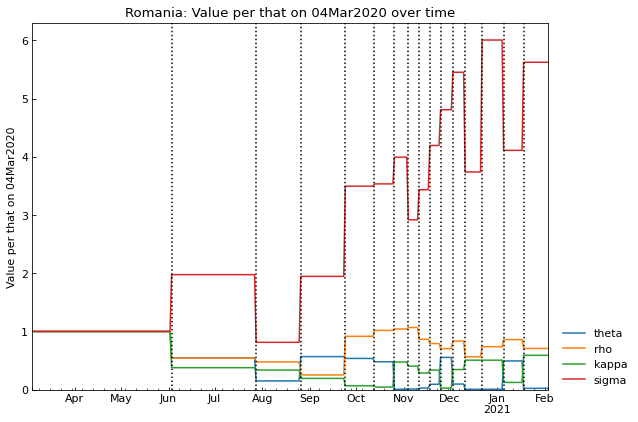

,theta,rho,kappa,sigma
Date,,,,
2020-03-04,1.000000,1.000000,1.000000,1.000000
2020-03-05,1.000000,1.000000,1.000000,1.000000
2020-03-06,1.000000,1.000000,1.000000,1.000000
2020-03-07,1.000000,1.000000,1.000000,1.000000
2020-03-08,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...
2021-01-30,0.023683,0.708114,0.590329,5.623001
2021-01-31,0.023683,0.708114,0.590329,5.623001
2021-02-01,0.023683,0.708114,0.590329,5.623001


In [15]:
snl.history_rate()

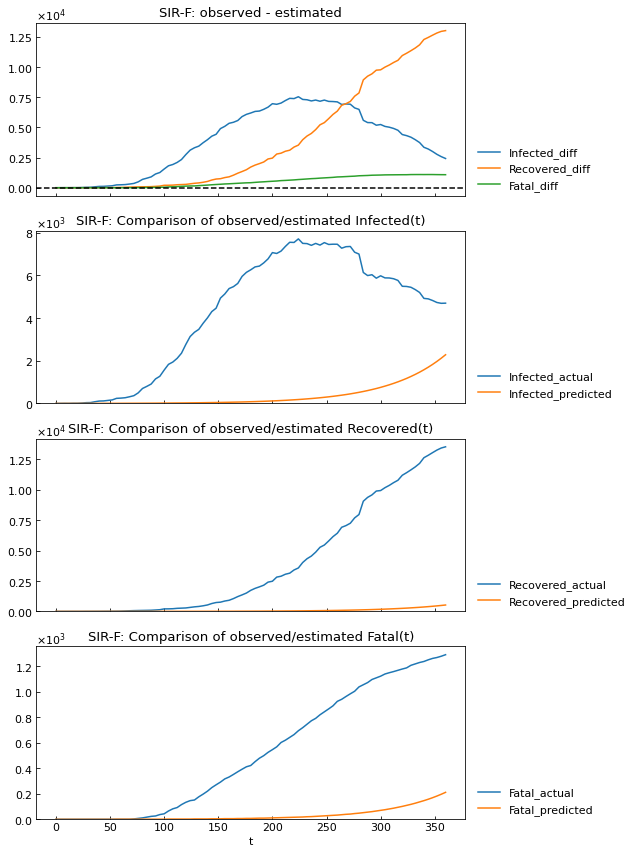

In [16]:
snl.estimate_accuracy("0th")

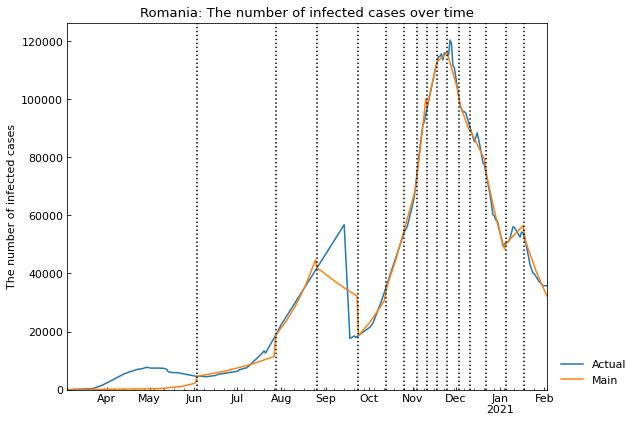

Scenario,Actual,Main
Date,,
2020-03-04,3,3
2020-03-05,5,3
2020-03-06,8,3
2020-03-07,6,4
2020-03-08,12,4
...,...,...
2021-01-30,36122,36217
2021-01-31,35814,35115
2021-02-01,35887,34047


In [17]:
snl.history("Infected")

In [18]:
snl.add(days=60)

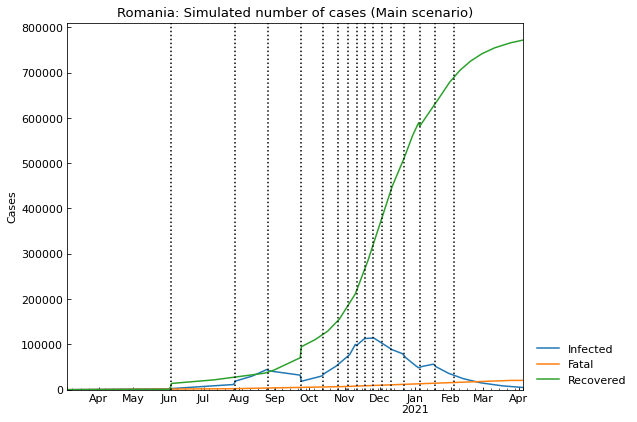

,Date,Confirmed,Fatal,Infected,Recovered
338,2021-02-05 00:00:00,743303,18835,30086,694382
339,2021-02-06 00:00:00,745269,18899,29169,697201
340,2021-02-07 00:00:00,747176,18961,28280,699935
341,2021-02-08 00:00:00,749024,19021,27418,702585
342,2021-02-09 00:00:00,750815,19079,26582,705154
343,2021-02-10 00:00:00,752553,19136,25772,707645
344,2021-02-11 00:00:00,754238,19191,24986,710061
345,2021-02-12 00:00:00,755870,19244,24224,712402
346,2021-02-13 00:00:00,757451,19295,23484,714672
347,2021-02-14 00:00:00,758988,19345,22767,716876


In [19]:
snl.simulate().tail(60).style.background_gradient(axis=0)

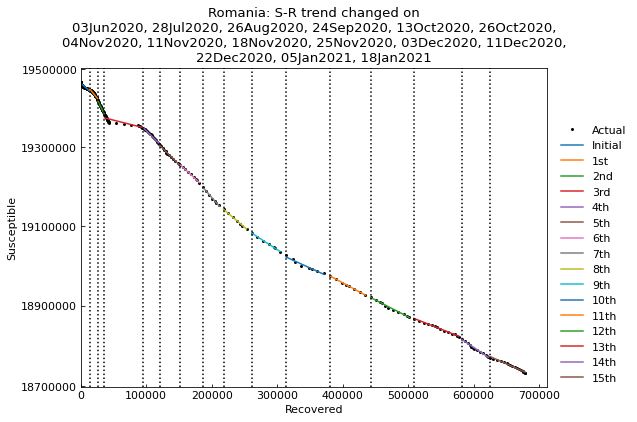


<SEWIR-F model: parameter estimation>
Running optimization with 8 CPUs...
	13th phase (26Aug2020 - 23Sep2020): finished 1002 trials in 3 min  5 sec
Completed optimization. Total: 9 min 21 sec


,Type,Start,End,Population,ODE,Rt,theta,kappa,rho1,rho2,...,tau,1/beta1 [day],alpha1 [-],1/beta2 [day],1/beta3 [day],1/alpha2 [day],1/gamma [day],RMSLE,Trials,Runtime
0th,Past,04Mar2020,02Jun2020,19466145,SEWIR-F,4.80,0.321176,0.000024,0.040364,0.919481,...,288,4,0.321,0,0,8189,47,1.987042,1003,3 min 3 sec
1st,Past,03Jun2020,27Jul2020,19466145,SEWIR-F,0.47,0.047859,0.000158,0.001290,0.641285,...,288,155,0.048,0,0,1263,58,0.589582,1121,3 min 2 sec
2nd,Past,28Jul2020,25Aug2020,19466145,SEWIR-F,1.41,0.137405,0.000008,0.004133,0.437585,...,288,48,0.137,0,0,26551,107,0.237153,1199,3 min 2 sec
3rd,Past,26Aug2020,23Sep2020,19466145,SEWIR-F,1.41,0.182069,0.000050,0.001574,0.146042,...,288,127,0.182,1,0,3978,39,0.267294,1002,3 min 5 sec
4th,Past,24Sep2020,12Oct2020,19466145,SEWIR-F,7.67,0.018090,0.000049,0.020645,0.142520,...,288,9,0.018,1,0,4115,17,0.021970,1286,3 min 2 sec
5th,Past,13Oct2020,25Oct2020,19466145,SEWIR-F,1.26,0.018499,0.000006,0.019863,0.463153,...,288,10,0.018,0,0,32074,18,0.048055,1305,3 min 1 sec
6th,Past,26Oct2020,03Nov2020,19466145,SEWIR-F,9.11,0.018062,0.000059,0.022153,0.137245,...,288,9,0.018,1,0,3374,17,0.037680,1338,3 min 1 sec
7th,Past,04Nov2020,10Nov2020,19466145,SEWIR-F,13.15,0.000229,0.000344,0.026682,0.191885,...,288,7,0.000,1,0,580,21,0.039626,1330,3 min 2 sec
8th,Past,11Nov2020,17Nov2020,19466145,SEWIR-F,4.43,0.000802,0.000286,0.035693,0.105812,...,288,5,0.001,1,1,699,19,0.044165,1301,3 min 2 sec
9th,Past,18Nov2020,24Nov2020,19466145,SEWIR-F,0.68,0.000836,0.000280,0.017162,0.783126,...,288,11,0.001,0,0,714,14,0.017224,1284,3 min 2 sec


In [20]:
model = cs.SEWIRF

snl = cs.Scenario(jhu_data, population_data, country=country)

snl.trend()
snl.estimate(model=model)

snl.summary()


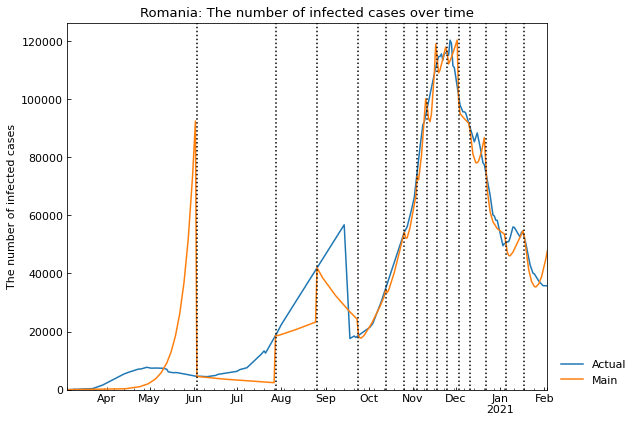

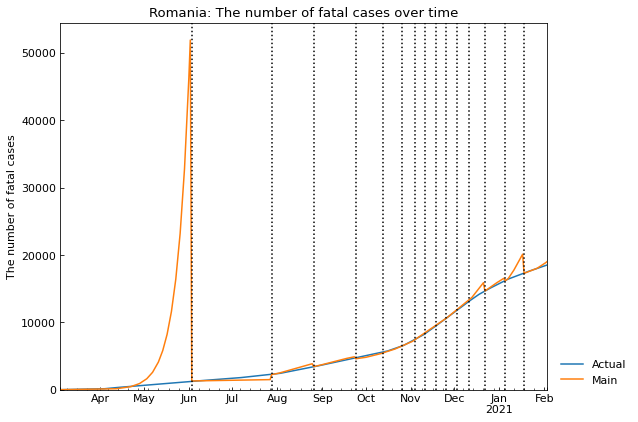

Scenario,Actual,Main
Date,,
2020-03-04,0,0
2020-03-05,0,0
2020-03-06,0,0
2020-03-07,0,1
2020-03-08,0,1
...,...,...
2021-01-30,18264,18392
2021-01-31,18335,18538
2021-02-01,18402,18694


In [21]:
snl.history("Infected")
snl.history("Fatal")

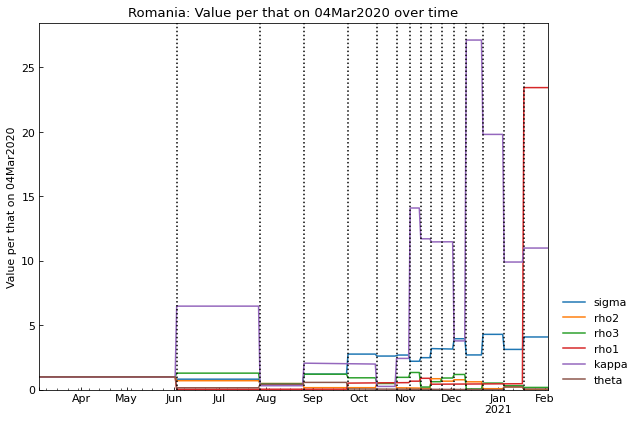

,sigma,rho2,rho3,rho1,kappa,theta
Date,,,,,,
2020-03-04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2020-03-08,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...
2021-01-30,4.090019,0.000585,0.175455,23.436632,10.989899,0.053898
2021-01-31,4.090019,0.000585,0.175455,23.436632,10.989899,0.053898
2021-02-01,4.090019,0.000585,0.175455,23.436632,10.989899,0.053898


In [22]:
snl.history_rate()

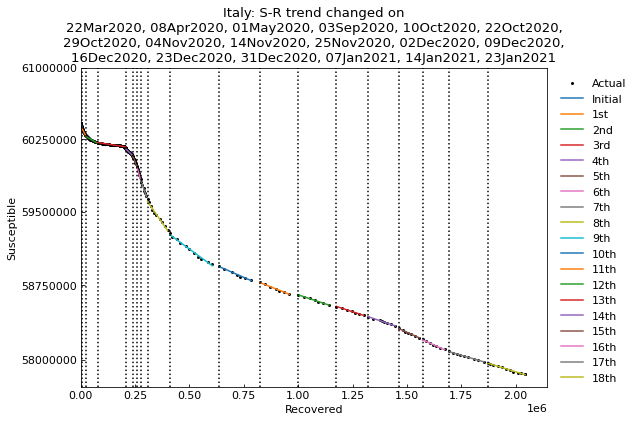


<SIR-F model: parameter estimation>
Running optimization with 8 CPUs...
	18th phase (23Dec2020 - 30Dec2020): finished  564 trials in 0 min 30 sec
Completed optimization. Total: 4 min 31 sec


,Type,Start,End,Population,ODE,Rt,theta,kappa,rho,sigma,tau,1/gamma [day],1/beta [day],alpha1 [-],1/alpha2 [day],RMSLE,Trials,Runtime
0th,Past,24Feb2020,21Mar2020,60421760,SIR-F,9.11,0.067960,0.000149,0.056666,0.005645,360,44,4,0.068,1675,0.675530,1673,3 min 1 sec
1st,Past,22Mar2020,07Apr2020,60421760,SIR-F,3.96,0.139055,0.000336,0.019487,0.003902,360,64,12,0.139,744,0.050460,1744,3 min 1 sec
2nd,Past,08Apr2020,30Apr2020,60421760,SIR-F,1.32,0.126684,0.000267,0.008027,0.005033,360,49,31,0.127,937,0.031101,1624,3 min 1 sec
3rd,Past,01May2020,02Sep2020,60421760,SIR-F,0.37,0.000141,0.000470,0.003048,0.007754,360,32,82,0.000,531,0.265547,1703,3 min 1 sec
4th,Past,03Sep2020,09Oct2020,60421760,SIR-F,2.17,0.000776,0.000078,0.010839,0.004914,360,50,23,0.001,3223,0.021143,1601,3 min 1 sec
5th,Past,10Oct2020,21Oct2020,60421760,SIR-F,4.91,0.000231,0.000113,0.020114,0.003985,360,62,12,0.000,2207,0.014170,1645,3 min 1 sec
6th,Past,22Oct2020,28Oct2020,60421760,SIR-F,8.39,0.000898,0.000150,0.024173,0.002730,360,91,10,0.001,1671,0.007162,239,0 min 20 sec
7th,Past,29Oct2020,03Nov2020,60421760,SIR-F,5.89,0.002473,0.000093,0.020402,0.003364,360,74,12,0.002,2674,0.012094,231,0 min 20 sec
8th,Past,04Nov2020,13Nov2020,60421760,SIR-F,3.42,0.014710,0.000014,0.017152,0.004932,360,50,14,0.015,17587,0.018931,228,0 min 20 sec
9th,Past,14Nov2020,24Nov2020,60421760,SIR-F,1.69,0.000553,0.000196,0.011415,0.006562,360,38,21,0.001,1273,0.012221,1136,2 min 1 sec


In [25]:
model = cs.SIRF
country = "Italy"
snl = cs.Scenario(jhu_data, population_data, country=country)

snl.trend()
snl.estimate(model=model)

snl.summary()

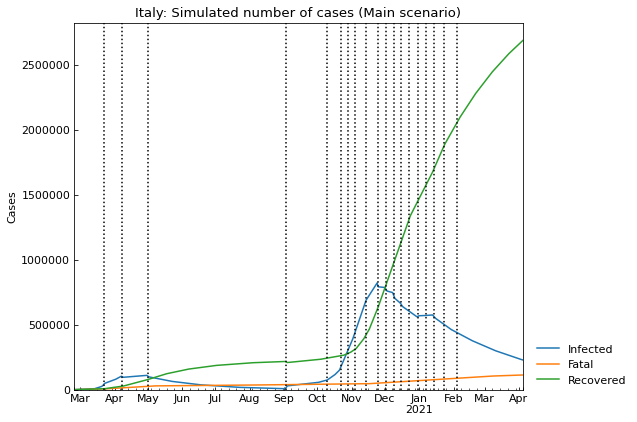

,Date,Confirmed,Fatal,Infected,Recovered
347,2021-02-05 00:00:00,2595527,92026,433513,2069988
348,2021-02-06 00:00:00,2605514,92514,428846,2084154
349,2021-02-07 00:00:00,2615393,92998,424227,2098168
350,2021-02-08 00:00:00,2625163,93475,419657,2112031
351,2021-02-09 00:00:00,2634827,93948,415134,2125745
352,2021-02-10 00:00:00,2644385,94415,410659,2139311
353,2021-02-11 00:00:00,2653838,94878,406230,2152730
354,2021-02-12 00:00:00,2663188,95335,401848,2166005
355,2021-02-13 00:00:00,2672435,95787,397511,2179137
356,2021-02-14 00:00:00,2681581,96235,393220,2192126


In [26]:
snl.add(days=60)
snl.simulate().tail(60).style.background_gradient(axis=0)

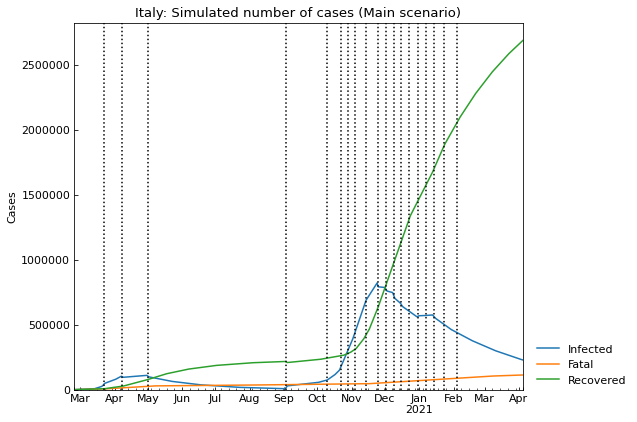

,Date,Confirmed,Fatal,Infected,Recovered
347,2021-02-05 00:00:00,2595527,92026,433513,2069988
348,2021-02-06 00:00:00,2605514,92514,428846,2084154
349,2021-02-07 00:00:00,2615393,92998,424227,2098168
350,2021-02-08 00:00:00,2625163,93475,419657,2112031
351,2021-02-09 00:00:00,2634827,93948,415134,2125745
352,2021-02-10 00:00:00,2644385,94415,410659,2139311
353,2021-02-11 00:00:00,2653838,94878,406230,2152730
354,2021-02-12 00:00:00,2663188,95335,401848,2166005
355,2021-02-13 00:00:00,2672435,95787,397511,2179137
356,2021-02-14 00:00:00,2681581,96235,393220,2192126


In [27]:
snl.simulate().tail(60).style.background_gradient(axis=0)